# Training

### Read in data

March Data:

In [85]:
import pandas as pd
df_march = pd.read_csv('./dataset-march.csv')

df_march

,Latitude,Longitude,Time,Day of Week,Dangerous
0,38.547651,-121.764442,40,Friday,0
1,38.545441,-121.757456,421,Friday,1
2,38.538532,-121.750111,807,Friday,0
3,38.541948,-121.771577,1127,Friday,1
4,38.534519,-121.747342,1208,Friday,1
...,...,...,...,...,...
74,38.544424,-121.764121,1240,Friday,0
75,38.535626,-121.755768,1015,Monday,1
76,38.536763,-121.757767,695,Tuesday,0
77,38.544300,-121.757508,1182,Tuesday,0


April Data:

In [86]:
df_april = pd.read_csv('./dataset-may.csv')

df_april

,Latitude,Longitude,Time,Day of Week,Dangerous
0,38.533444,-121.754884,466,Monday,1
1,38.537745,-121.746125,564,Monday,1
2,38.540827,-121.747696,551,Monday,0
3,38.552682,-121.456162,1201,Monday,0
4,38.536821,-121.753100,534,Tuesday,1
...,...,...,...,...,...
87,38.546639,-121.764033,739,Thursday,0
88,38.571021,-121.765286,688,Wednesday,0
89,38.531302,-121.763791,1051,Thursday,1
90,38.542750,-121.759105,1086,Monday,0


May Data:

In [87]:
df_may = pd.read_csv('./dataset-may.csv')

df_may

,Latitude,Longitude,Time,Day of Week,Dangerous
0,38.533444,-121.754884,466,Monday,1
1,38.537745,-121.746125,564,Monday,1
2,38.540827,-121.747696,551,Monday,0
3,38.552682,-121.456162,1201,Monday,0
4,38.536821,-121.753100,534,Tuesday,1
...,...,...,...,...,...
87,38.546639,-121.764033,739,Thursday,0
88,38.571021,-121.765286,688,Wednesday,0
89,38.531302,-121.763791,1051,Thursday,1
90,38.542750,-121.759105,1086,Monday,0


Combine the data:

In [88]:
frames = [df_march, df_april, df_may]
  
df_raw = pd.concat(frames, ignore_index=True)
df_raw

,Latitude,Longitude,Time,Day of Week,Dangerous
0,38.547651,-121.764442,40,Friday,0
1,38.545441,-121.757456,421,Friday,1
2,38.538532,-121.750111,807,Friday,0
3,38.541948,-121.771577,1127,Friday,1
4,38.534519,-121.747342,1208,Friday,1
...,...,...,...,...,...
258,38.546639,-121.764033,739,Thursday,0
259,38.571021,-121.765286,688,Wednesday,0
260,38.531302,-121.763791,1051,Thursday,1
261,38.542750,-121.759105,1086,Monday,0


### Data Preprocessing

Get rid of outliers

In [89]:
# Remove everything outside of davis ( -121.79 > Longitude, Longitude > -121.60) (Latitude > 38.59)
for index, row in df.iterrows():
    if row['Latitude'] > 38.55 or row['Longitude'] > -121.60 or row['Longitude'] < -121.79:
        df.drop(index, inplace=True)

Scaling data using minmax

In [90]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()
dow_col = df_raw['Day of Week']
# Drop day of week, as it does not need to be scaled
df_nodow = df_raw.drop(['Day of Week', 'Dangerous'], axis='columns')

# Fit the scaler to your data to compute the minimum and maximum values
scaler.fit(df_nodow)

# Perform the Min-Max normalization on your data
normalized_data = scaler.transform(df_nodow)
df = pd.DataFrame(normalized_data, columns = ['Latitude','Longitude','Time'])

df['Day of Week'] = dow_col
df['Dangerous'] = df_raw['Dangerous']
df

,Latitude,Longitude,Time,Day of Week,Dangerous
0,0.308329,0.121066,0.026444,Friday,0
1,0.272708,0.140551,0.291580,Friday,1
2,0.161364,0.161040,0.560195,Friday,0
3,0.216413,0.101163,0.782881,Friday,1
4,0.096699,0.168762,0.839248,Friday,1
...,...,...,...,...,...
258,0.292012,0.122207,0.512874,Thursday,0
259,0.684946,0.118710,0.477383,Wednesday,0
260,0.044849,0.122881,0.729993,Thursday,1
261,0.229343,0.135953,0.754349,Monday,0


One-Hot Encoding Day of Week

In [91]:
from sklearn.preprocessing import OneHotEncoder

# mapping_dictionary_value={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
ohc = OneHotEncoder()

ohe = ohc.fit_transform(df['Day of Week'].values.reshape(-1, 1)).toarray()
dfOneHot = pd.DataFrame(ohe, columns=["DoW_" + str(ohc.categories_[0][i]) for i in range(len(ohc.categories_[0]))])

dfh = pd.concat([df, dfOneHot], axis=1)
dfh.drop("Day of Week", axis='columns', inplace=True)
dfh

,Latitude,Longitude,Time,Dangerous,DoW_Friday,DoW_Monday,DoW_Saturday,DoW_Sunday,DoW_Thursday,DoW_Tuesday,DoW_Wednesday
0,0.308329,0.121066,0.026444,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.272708,0.140551,0.291580,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.161364,0.161040,0.560195,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.216413,0.101163,0.782881,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.096699,0.168762,0.839248,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
258,0.292012,0.122207,0.512874,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
259,0.684946,0.118710,0.477383,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
260,0.044849,0.122881,0.729993,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
261,0.229343,0.135953,0.754349,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Clustering

Agglomerative Clustering

In [92]:
from sklearn.cluster import AgglomerativeClustering
df_unsup = df.drop(["Dangerous", "Day of Week"], axis='columns')
distance_threshold = 0.2
model = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='single', distance_threshold=distance_threshold)
model.fit(df_unsup)
labels = model.labels_
labels

array([4, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       1, 1, 1, 2, 1, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 4, 1,
       1, 1, 1, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4,
       4, 4, 1, 4, 4, 4, 4, 1, 1, 4, 4, 1, 1, 4, 4, 4, 4, 4, 1, 1, 1, 1,
       4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 1, 4,
       4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 1, 4, 4, 1, 1, 4, 4, 4, 4, 4,
       1, 1, 1, 1, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4],
      dtype=int64)

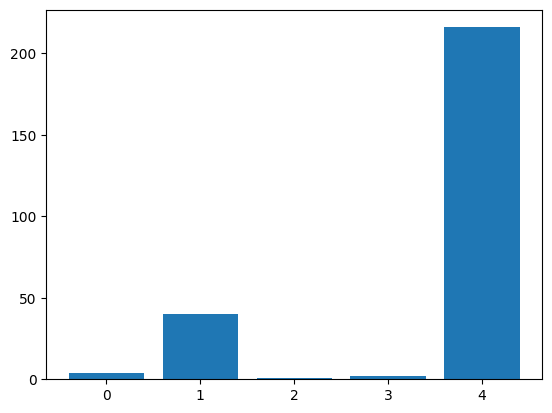

In [93]:
from matplotlib import pyplot as plt
from collections import defaultdict, OrderedDict

dic = defaultdict(int)
for n in labels:
    dic[n] += 1
od = OrderedDict(sorted(dic.items()))
plt.bar(range(len(od)), list(od.values()), align='center')
plt.xticks(range(len(od)), list(od.keys()))
plt.show()

K-means Clustering

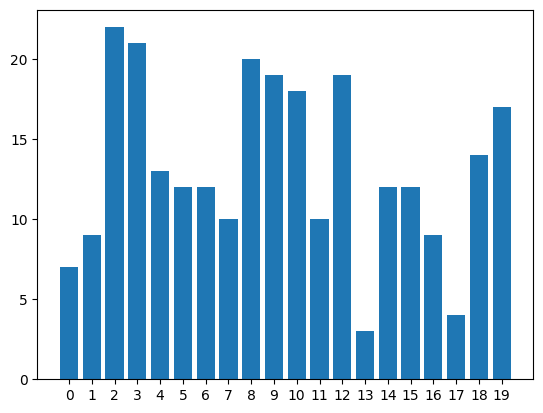

In [94]:
from sklearn import cluster

from matplotlib import pyplot as plt
from collections import defaultdict, OrderedDict

kmeans = cluster.KMeans(20)
kmeans.fit(df_nodow)
labels = kmeans.labels_

dic = defaultdict(int)
for n in labels:
    dic[n] += 1
od = OrderedDict(sorted(dic.items()))
plt.bar(range(len(od)), list(od.values()), align='center')
plt.xticks(range(len(od)), list(od.keys()))
plt.show()

### General Scatter Plots

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

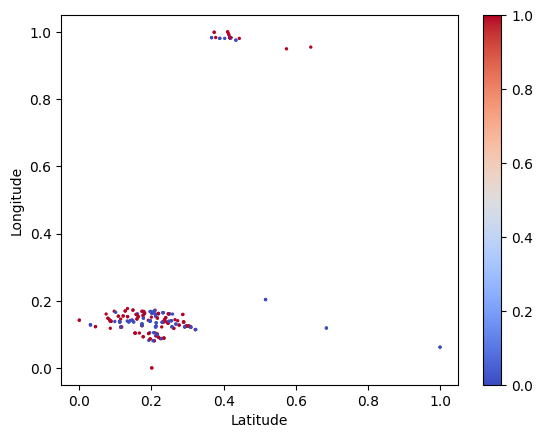

In [95]:
df.plot.scatter(x="Latitude", y="Longitude", s=2, c=df["Dangerous"], cmap='coolwarm')

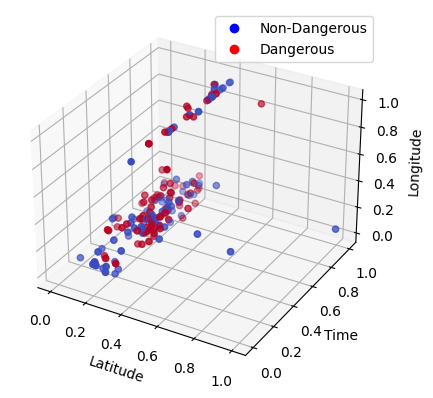

In [96]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
y = df['Time']
x = df['Latitude']
z = df['Longitude']
c = df['Dangerous']
ax.scatter(x, y, z, c=c, cmap='coolwarm')

ax.set_ylabel('Time')
ax.set_xlabel('Latitude')
ax.set_zlabel('Longitude')

import matplotlib

colors = ['blue', 'red']
scatter1_proxy = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colors[0], marker = 'o')
scatter2_proxy = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colors[1], marker = 'o')
ax.legend([scatter1_proxy, scatter2_proxy], ['Non-Dangerous', 'Dangerous'], numpoints = 1)

### Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Without Day of Week
df_ndow = df.drop("Day of Week", axis='columns')
X_train, X_test, y_train, y_test = train_test_split(df_ndow.drop(['Dangerous'], axis=1), df_ndow.Dangerous, test_size=0.2, random_state=21)

# With Day of Week
# X_train, X_test, y_train, y_test = train_test_split(dfh.drop(['Dangerous'], axis=1), dfh.Dangerous, test_size=0.2, random_state=21)


logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [98]:
yhat_test = logreg.predict(X_test)

In [99]:
logreg.score(X_test, y_test)

0.7358490566037735

In [100]:
from sklearn.metrics import classification_report

print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.79      0.60      0.68        25
           1       0.71      0.86      0.77        28

    accuracy                           0.74        53
   macro avg       0.75      0.73      0.73        53
weighted avg       0.75      0.74      0.73        53



K-nearest Neighbors

In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

cv_scores = []  # To store the cross-validation scores for each K

k_values = range(1, 21)

# Iterate over K values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5-fold cross-validation
    cv_scores.append(scores.mean())  # Store the average cross-validation score

# Print the cross-validation scores for each K
for k, score in zip(k_values, cv_scores):
    print("K =", k, "Accuracy:", score)

K = 1 Accuracy: 0.7285714285714286
K = 2 Accuracy: 0.619047619047619
K = 3 Accuracy: 0.619047619047619
K = 4 Accuracy: 0.6428571428571429
K = 5 Accuracy: 0.6000000000000001
K = 6 Accuracy: 0.6047619047619048
K = 7 Accuracy: 0.6
K = 8 Accuracy: 0.6
K = 9 Accuracy: 0.5857142857142857
K = 10 Accuracy: 0.5476190476190477
K = 11 Accuracy: 0.5666666666666667
K = 12 Accuracy: 0.5428571428571429
K = 13 Accuracy: 0.5523809523809524
K = 14 Accuracy: 0.5333333333333334
K = 15 Accuracy: 0.5142857142857142
K = 16 Accuracy: 0.5238095238095238
K = 17 Accuracy: 0.5095238095238095
K = 18 Accuracy: 0.5142857142857143
K = 19 Accuracy: 0.49523809523809514
K = 20 Accuracy: 0.5285714285714287


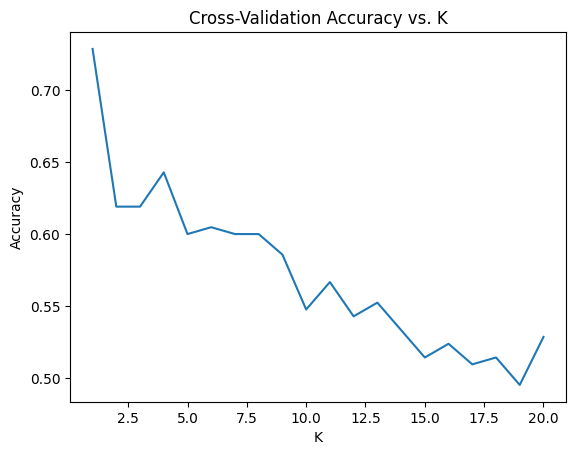

In [102]:
import matplotlib.pyplot as plt

# Plot the cross-validation scores for each K
plt.plot(k_values, cv_scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy vs. K')
plt.show()

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Instantiate the KNN classifier
knn = KNeighborsClassifier(n_neighbors=7)

# Train the KNN model
knn.fit(X_train, y_train)

# Predict on the testing data
y_pred = knn.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

knn.predict_proba(X_test)

Accuracy: 0.5471698113207547


array([[0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.14285714, 0.85714286],
       [0.42857143, 0.57142857],
       [0.57142857, 0.42857143],
       [0.28571429, 0.71428571],
       [0.14285714, 0.85714286],
       [0.42857143, 0.57142857],
       [0.        , 1.        ],
       [0.28571429, 0.71428571],
       [0.57142857, 0.42857143],
       [0.28571429, 0.71428571],
       [0.57142857, 0.42857143],
       [0.28571429, 0.71428571],
       [0.57142857, 0.42857143],
       [0.42857143, 0.57142857],
       [0.57142857, 0.42857143],
       [0.42857143, 0.57142857],
       [0.71428571, 0.28571429],
       [0.14285714, 0.85714286],
       [0.57142857, 0.42857143],
       [0.42857143, 0.57142857],
       [0.85714286, 0.14285714],
       [0.85714286, 0.14285714],
       [0.42857143, 0.57142857],
       [0.        , 1.        ],
       [0.42857143, 0.57142857],
       [0.42857143, 0.57142857],
       [0.28571429, 0.71428571],
       [0.        , 1.        ],
       [1.

### Save models

In [104]:
import joblib

joblib.dump(logreg, "logreg_model")
joblib.dump(knn, "knn_model")
joblib.dump(scaler, "scaler")

['scaler']

### Code to load model

In [105]:
loaded_model = joblib.load("logreg_model")
result = loaded_model.score(X_test, y_test)
print(result)

0.7358490566037735


### Show probabilities of non-danger and danger

In [108]:
sample_input = pd.DataFrame([[38.537277, -121.757298, 1252]], columns=["Latitude", "Longitude", "Time"])

loaded_scaler = joblib.load("scaler")
# Transform sample input
sample_input = pd.DataFrame(scaler.transform(sample_input), columns = ['Latitude','Longitude','Time'])
sample_input



,Latitude,Longitude,Time
0,0.14114,0.140992,0.869868


In [ ]:
loaded_model.predict_proba(sample_input)

array([[0.40804586, 0.59195414]])

In [ ]:
X_test

,Latitude,Longitude,Time
52,0.413805,1.000000,0.707724
17,0.346064,0.581353,0.728601
40,0.656107,0.147140,0.555324
6,0.705320,0.067034,0.767571
9,0.592935,0.634852,0.118302
213,0.356859,0.423724,0.712596
105,0.272950,0.604857,0.649965
151,0.663563,0.161635,0.873347
99,0.596068,0.225018,0.689631
130,0.634813,0.003747,1.000000
